<a href="https://colab.research.google.com/github/RichardKameri/tydata/blob/main/heartanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


GETTING THE DATASET


In [35]:
df = pd.read_csv('/content/heartanalysis.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [36]:
df.nunique()

,0
State,54
Sex,2
GeneralHealth,5
PhysicalHealthDays,31
MentalHealthDays,31
LastCheckupTime,4
PhysicalActivities,2
SleepHours,24
RemovedTeeth,4
HadHeartAttack,2


In [37]:
df['AgeCategory'].value_counts()

,count
AgeCategory,
Age 65 to 69,47099
Age 60 to 64,44511
Age 70 to 74,43472
Age 55 to 59,36821
Age 80 or older,36251
Age 50 to 54,33644
Age 75 to 79,32518
Age 40 to 44,29942
Age 45 to 49,28531


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [40]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


DATA CLEANING

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [43]:
# checking for missing values
df.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,1198
PhysicalHealthDays,10927
MentalHealthDays,9067
LastCheckupTime,8308
PhysicalActivities,1093
SleepHours,5453
RemovedTeeth,11360
HadHeartAttack,3065


<Axes: >

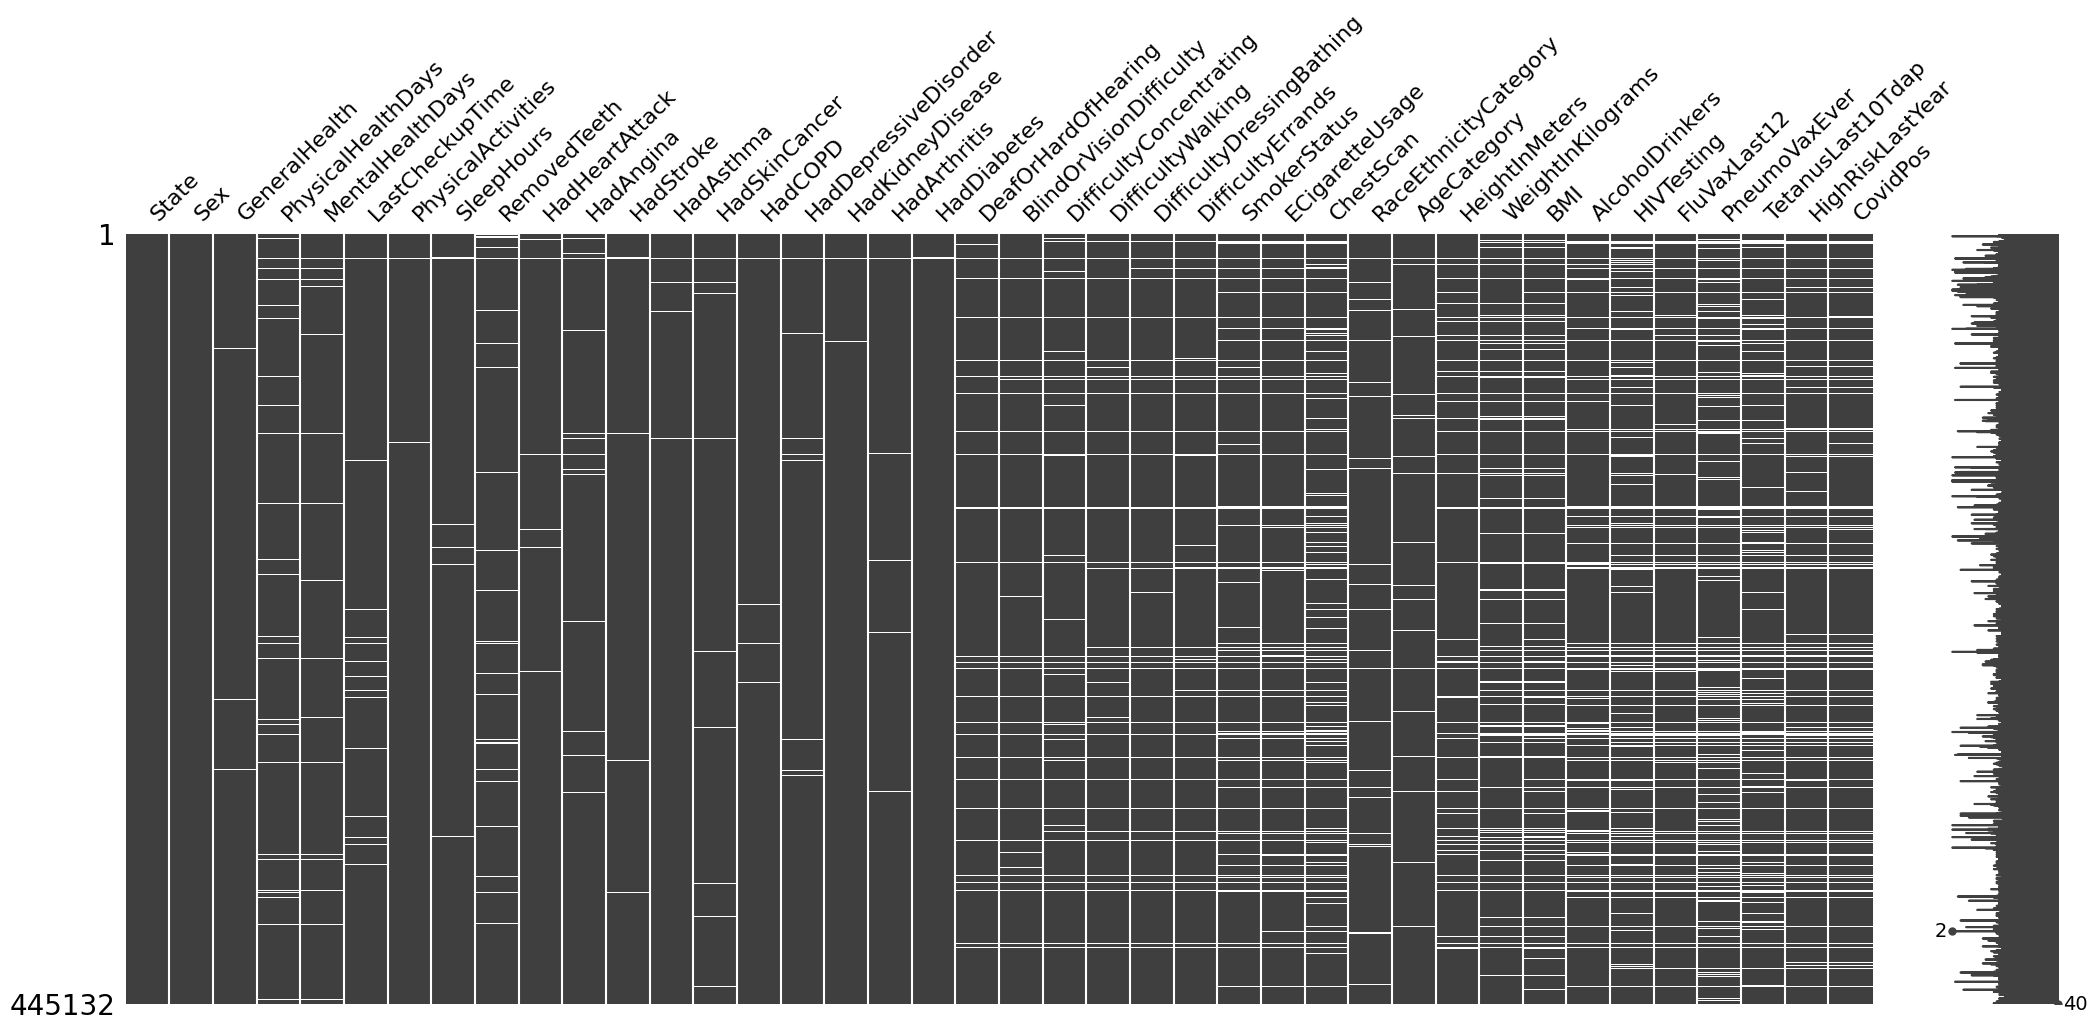

In [44]:
# dealing with missing values
import missingno as msno
msno.matrix(df)

<Axes: >

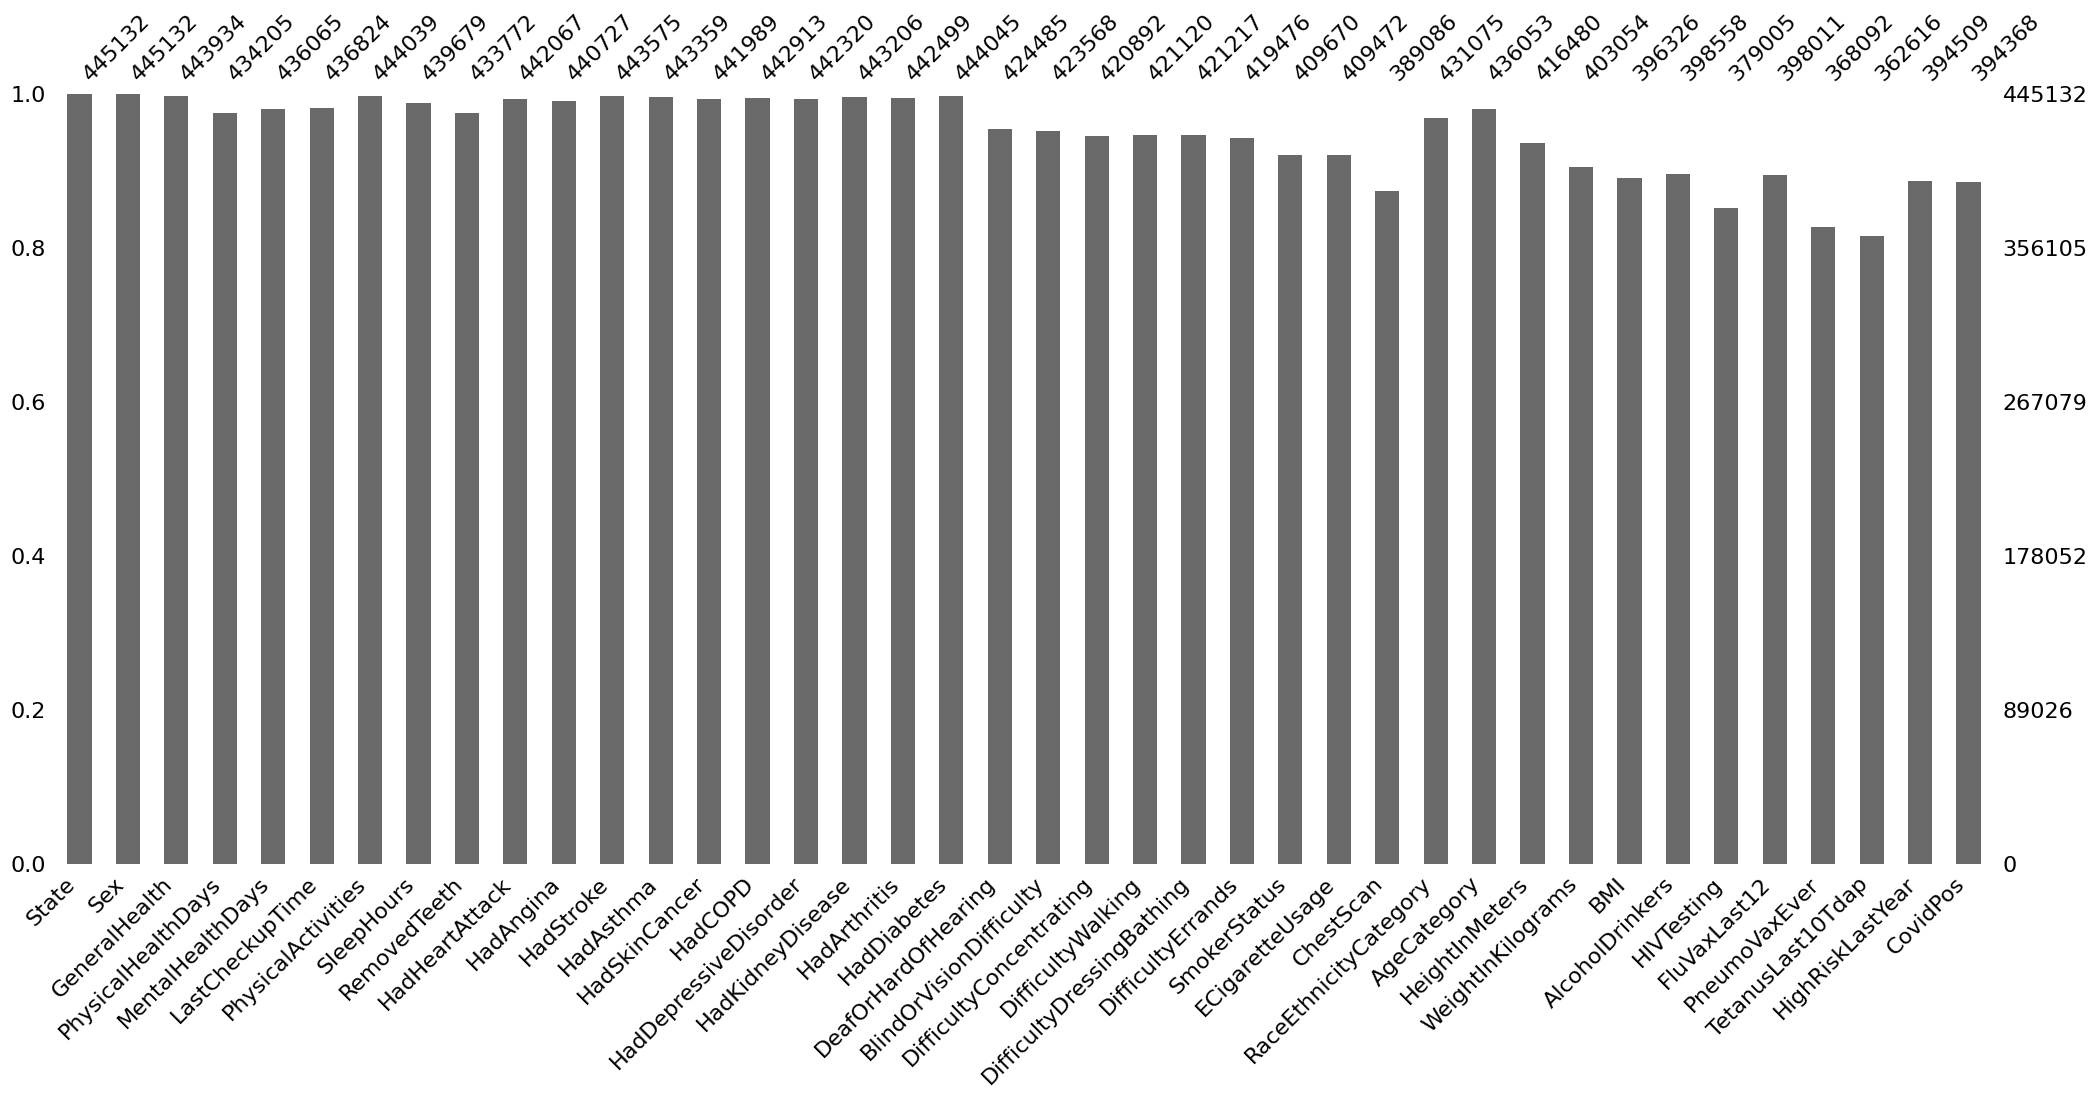

In [45]:
msno.bar(df)

<Axes: >

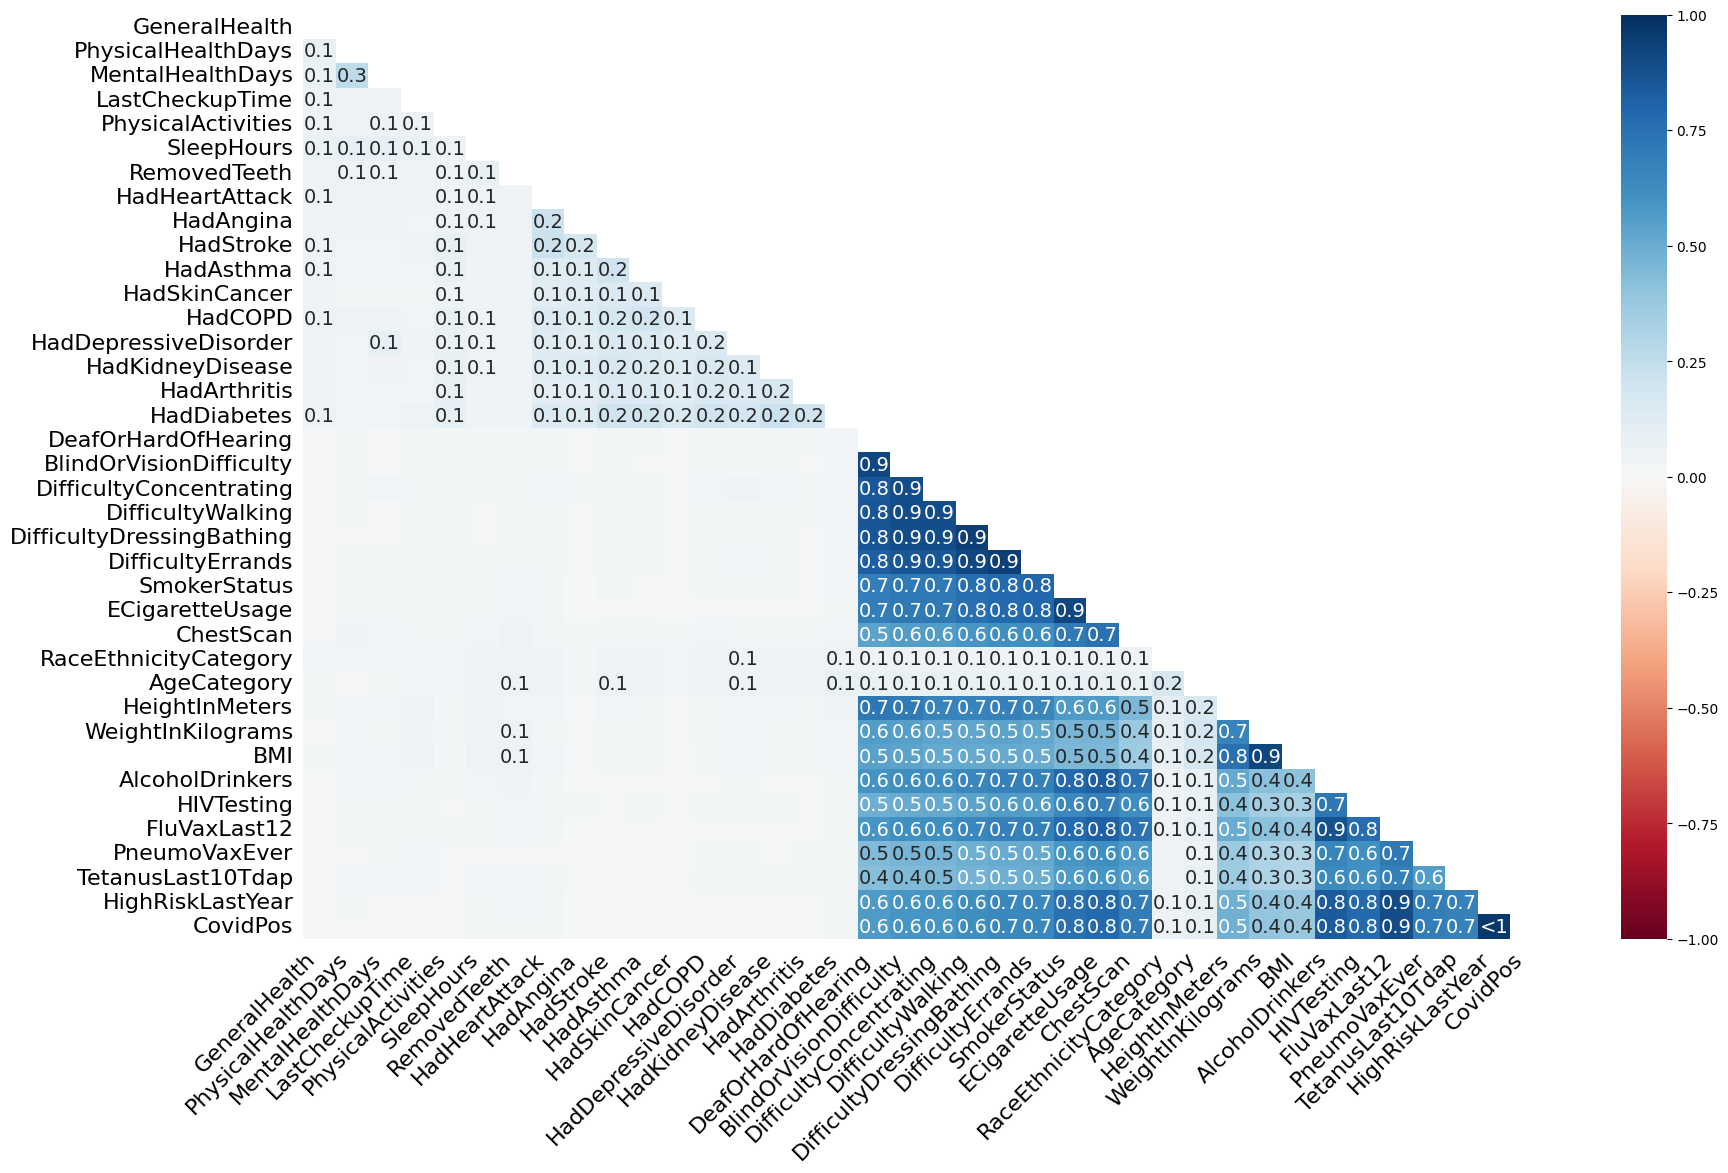

In [60]:
msno.heatmap(df)

DROPING UNNECESSARY COLUMNS


In [66]:
# Drop the last six columns
df = df.drop(df.columns[-6:], axis=1)

In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [68]:
# Assuming 'df' is your DataFrame
columns_to_drop = [24, 23, 22, 21, 20, 19]
# Drop the columns by index
df.drop(columns=df.columns[columns_to_drop], axis=1, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   State                  445132 non-null  object 
 1   Sex                    445132 non-null  object 
 2   GeneralHealth          443934 non-null  object 
 3   PhysicalHealthDays     434205 non-null  float64
 4   MentalHealthDays       436065 non-null  float64
 5   LastCheckupTime        436824 non-null  object 
 6   PhysicalActivities     444039 non-null  object 
 7   SleepHours             439679 non-null  float64
 8   RemovedTeeth           433772 non-null  object 
 9   HadHeartAttack         442067 non-null  object 
 10  HadAngina              440727 non-null  object 
 11  HadStroke              443575 non-null  object 
 12  HadAsthma              443359 non-null  object 
 13  HadSkinCancer          441989 non-null  object 
 14  HadCOPD                442913 non-nu

In [70]:
import pandas as pd

# Assuming 'df' is your DataFrame
columns_to_drop = [12, 14, 15, 17, 20, 21, 24]

# Drop the columns by index
df.drop(columns=df.columns[columns_to_drop], axis=1, inplace=True)

# Save the cleaned DataFrame to a file (e.g., CSV)
df.to_csv('cleaned_data.csv', index=False)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   State                  445132 non-null  object 
 1   Sex                    445132 non-null  object 
 2   GeneralHealth          443934 non-null  object 
 3   PhysicalHealthDays     434205 non-null  float64
 4   MentalHealthDays       436065 non-null  float64
 5   LastCheckupTime        436824 non-null  object 
 6   PhysicalActivities     444039 non-null  object 
 7   SleepHours             439679 non-null  float64
 8   RemovedTeeth           433772 non-null  object 
 9   HadHeartAttack         442067 non-null  object 
 10  HadAngina              440727 non-null  object 
 11  HadStroke              443575 non-null  object 
 12  HadSkinCancer          441989 non-null  object 
 13  HadKidneyDisease       443206 non-null  object 
 14  HadDiabetes            444045 non-nu

<Axes: >

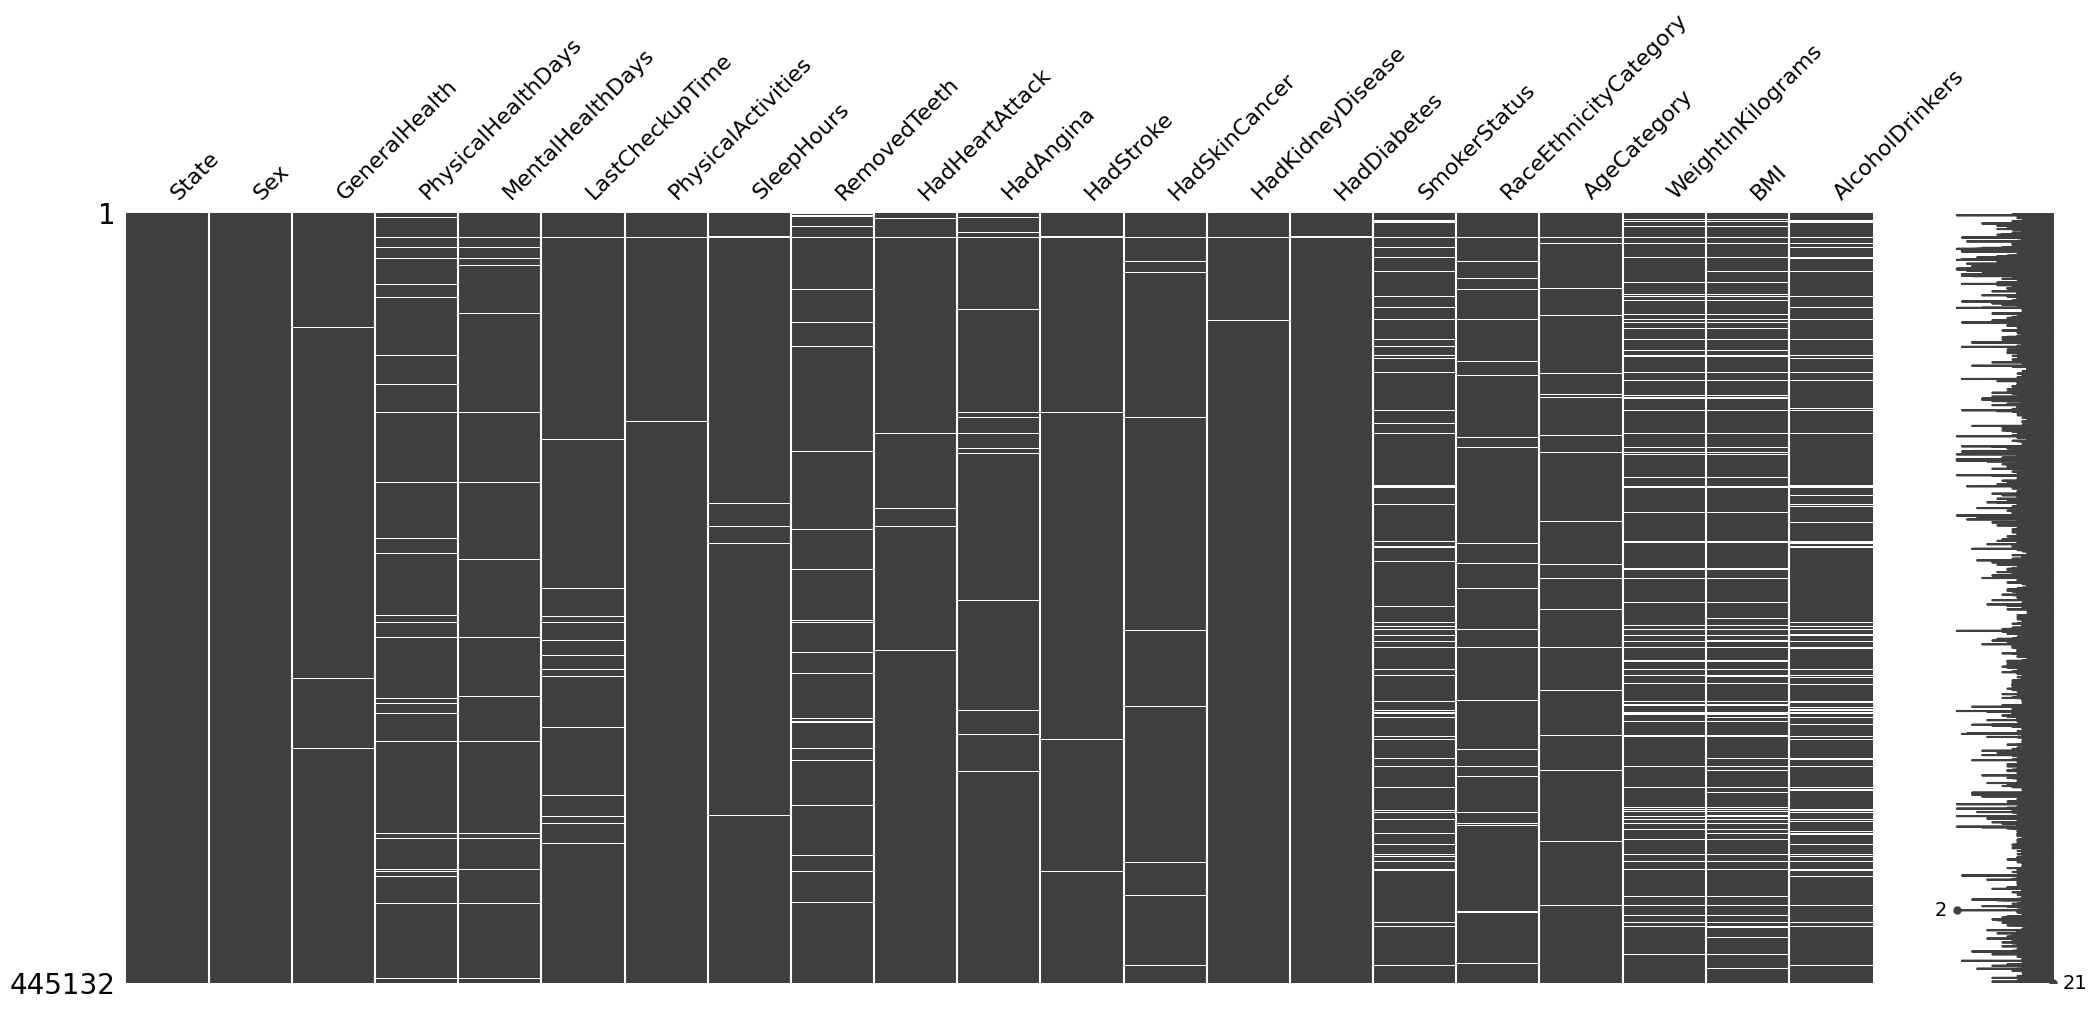

In [72]:
msno.matrix(df)

<Axes: >

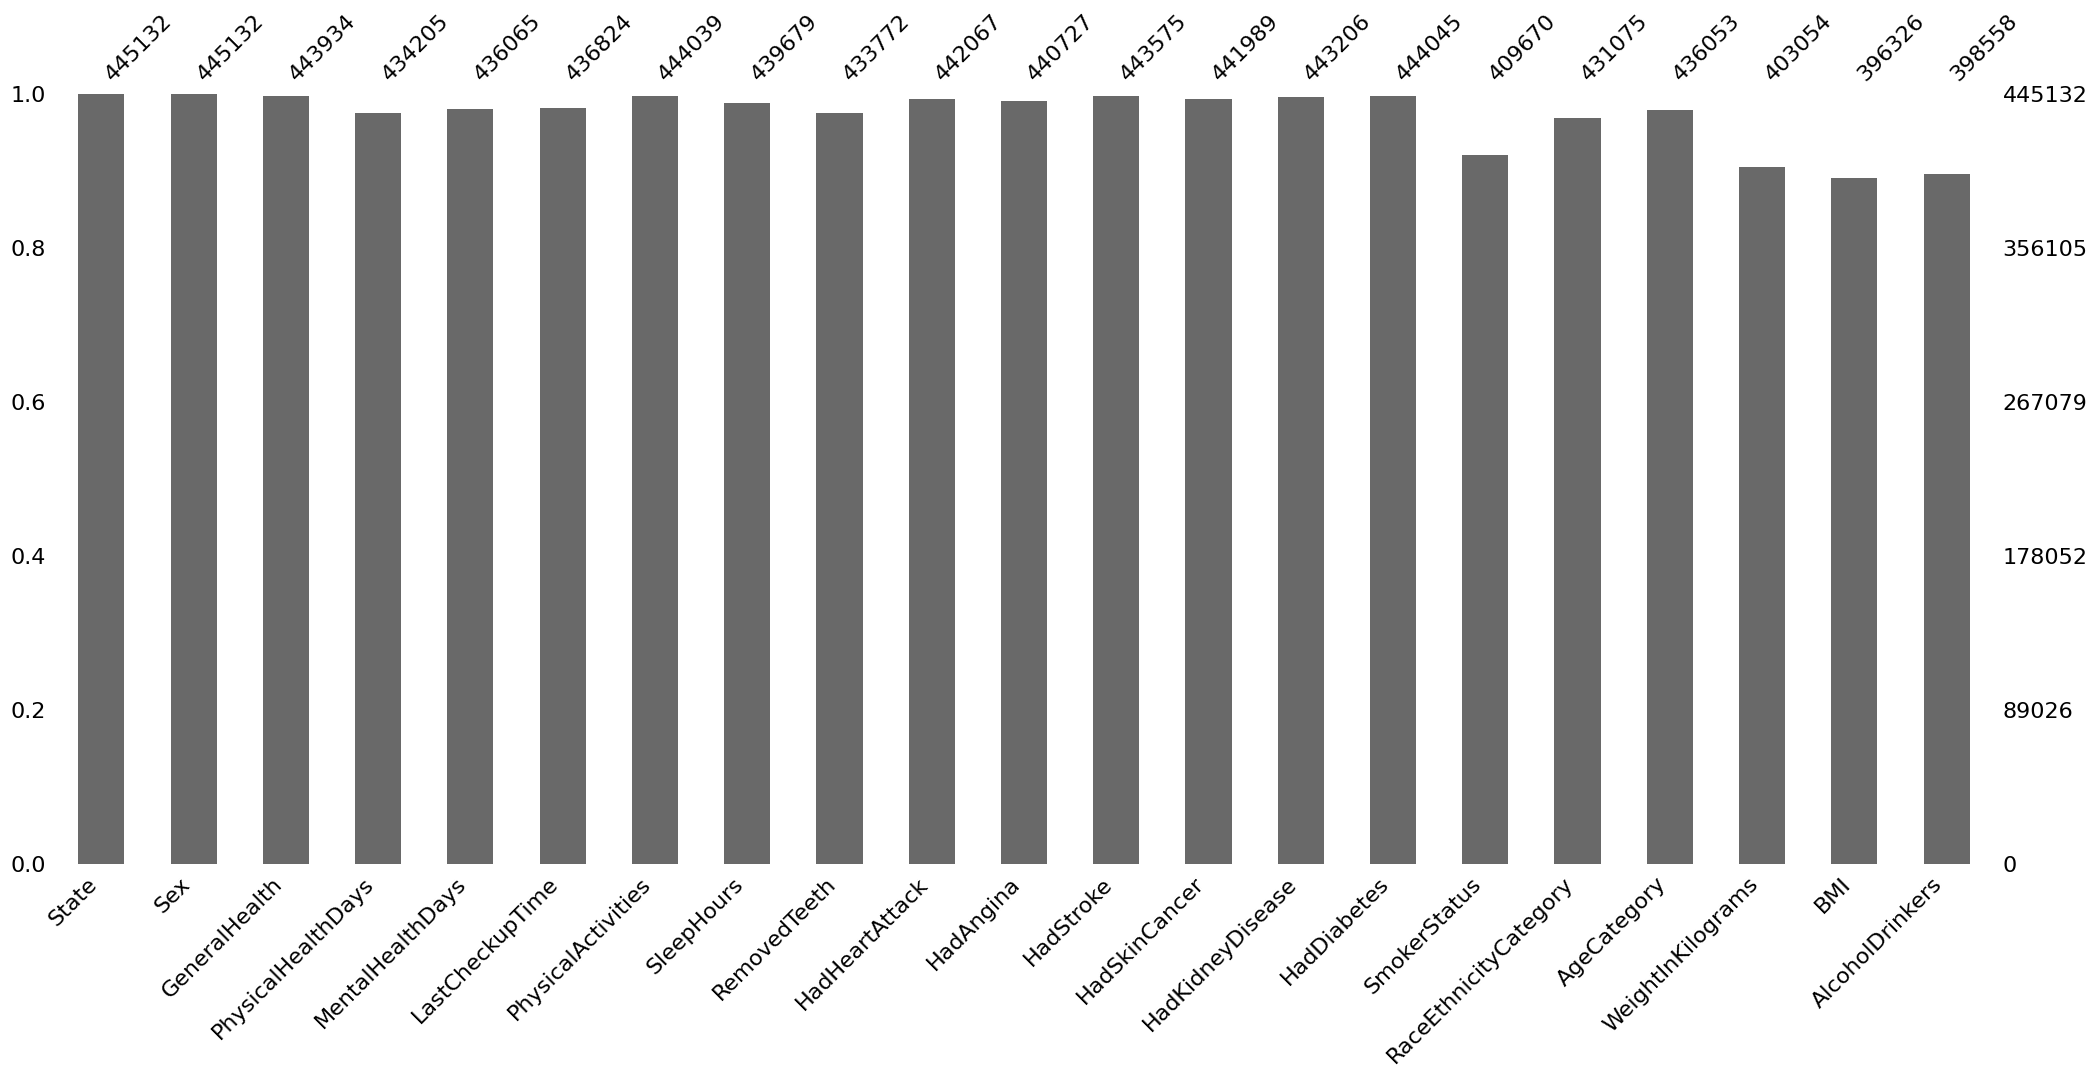

In [73]:
msno.bar(df)

<Axes: >

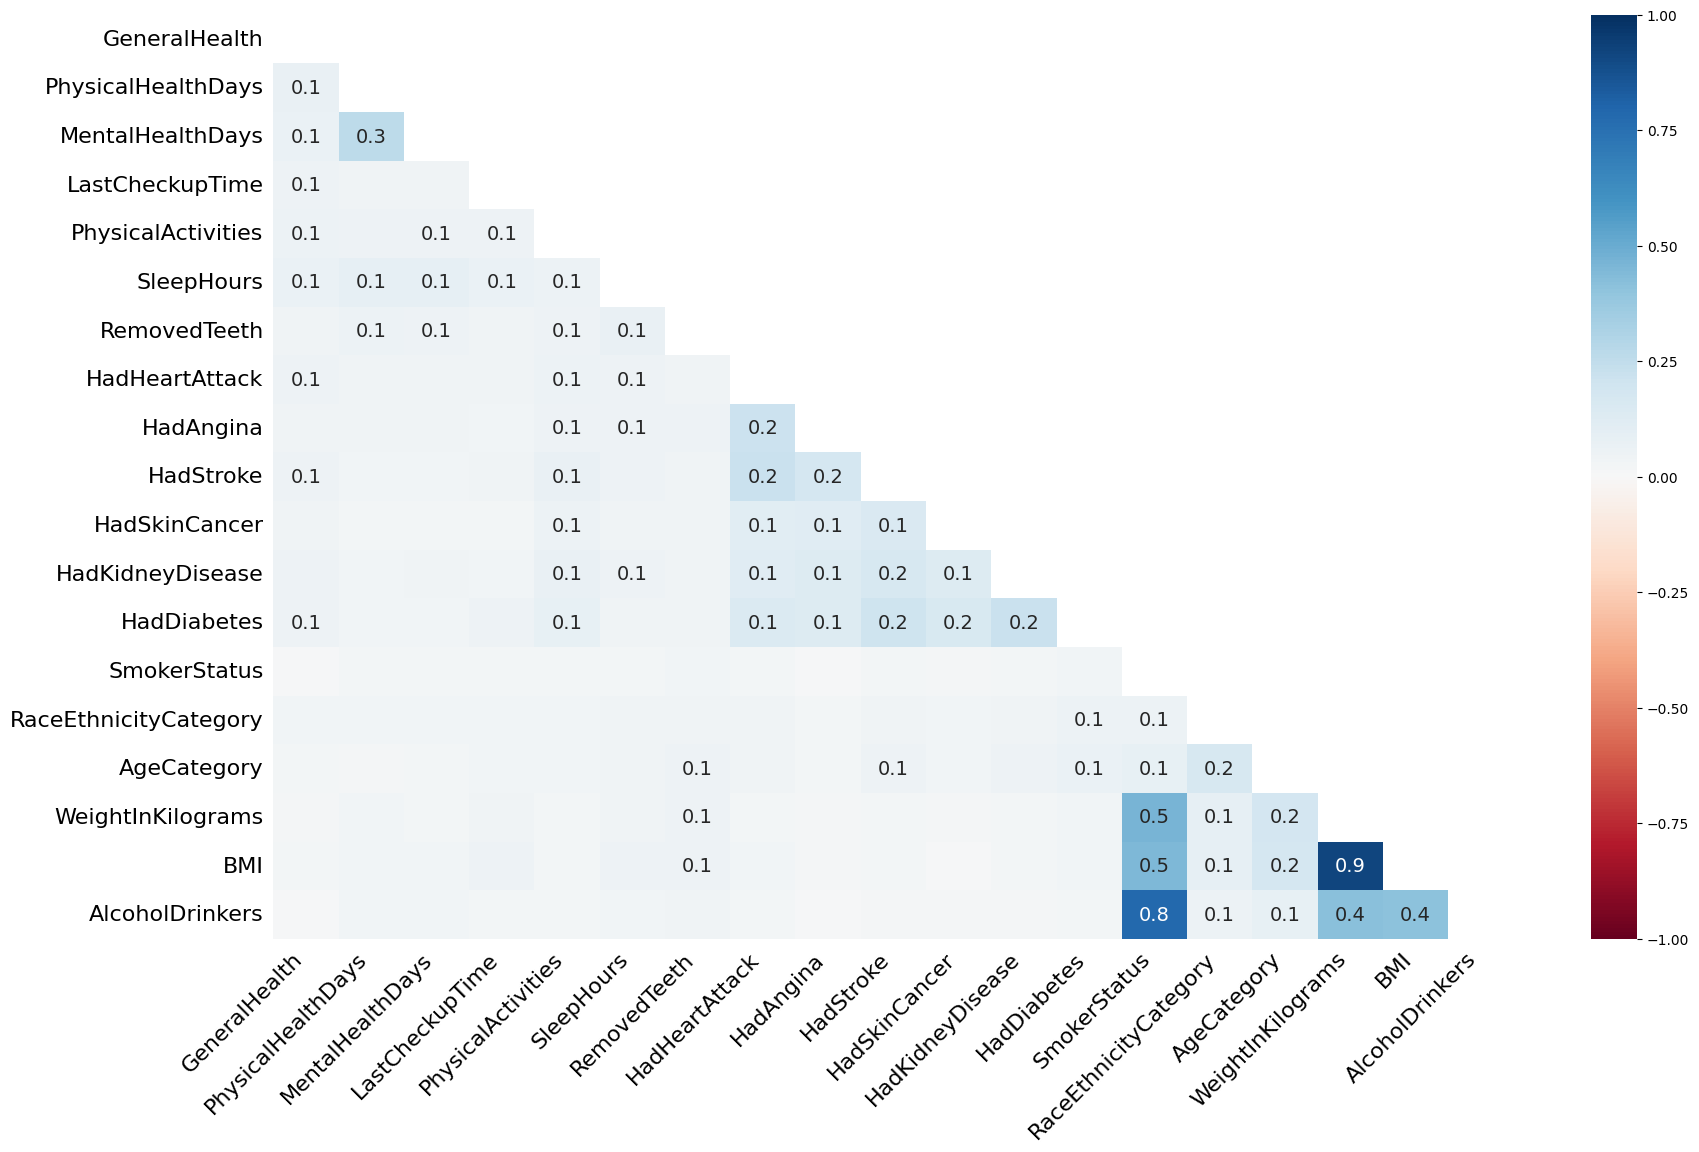

In [74]:
msno.heatmap(df)

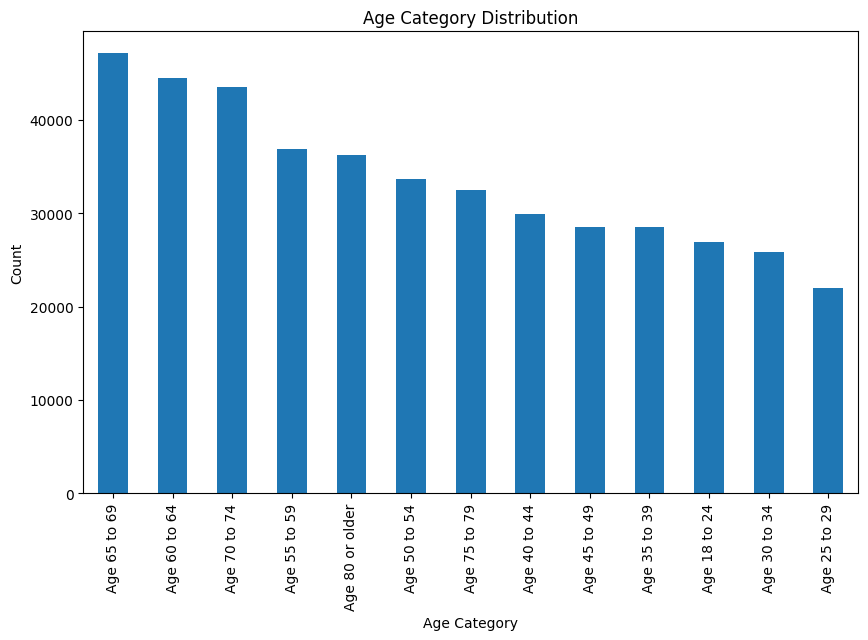

In [76]:
# a histogram to show the agecategory distribution
plt.figure(figsize=(10, 6))
df['AgeCategory'].value_counts().plot(kind='bar')
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

MOST PEOPLE ARE THE AGE 65-69

In [77]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadSkinCancer', 'HadKidneyDisease', 'HadDiabetes',
       'SmokerStatus', 'RaceEthnicityCategory', 'AgeCategory',
       'WeightInKilograms', 'BMI', 'AlcoholDrinkers'],
      dtype='object')

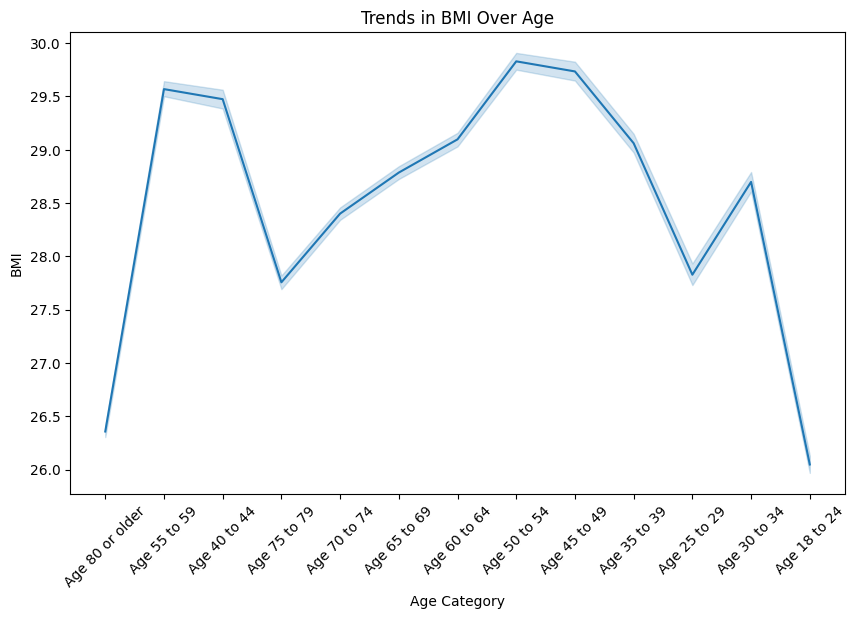

In [79]:
# line plot for trends in BMI over age
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(x='AgeCategory', y='BMI', data=df)
plt.title('Trends in BMI Over Age')
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()